In [ ]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


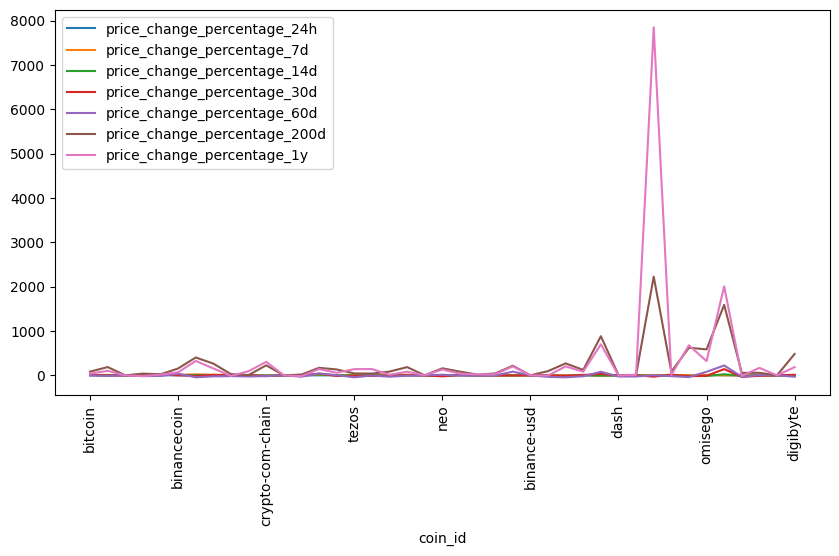

In [ ]:
# Plot your data to see what's in your DataFrame
df_market_data.plot.line(figsize=(10, 5), rot=90)

plt.show()

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
                                                                    'price_change_percentage_14d', 'price_change_percentage_30d',
                                                                    'price_change_percentage_60d', 'price_change_percentage_200d',
                                                                    'price_change_percentage_1y']])

In [ ]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns = ['price_change_percentage_24h',
                                                                    'price_change_percentage_7d',
                                                                    'price_change_percentage_14d',
                                                                    'price_change_percentage_30d',
                                                                    'price_change_percentage_60d',
                                                                    'price_change_percentage_200d',
                                                                    'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_data_scaled['crypto_names'] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('crypto_names')

# Display sample data
df_market_data_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [ ]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
  # Inside the loop:
  # 1. Create a KMeans model using the loop counter for the n_clusters
  k_model = KMeans(n_clusters = i, random_state = 0)
  # 2. Fit the model to the data using `df_market_data_scaled`
  k_model.fit(df_market_data_scaled)
  # 3. Append the model.inertia_ to the inertia list
  inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

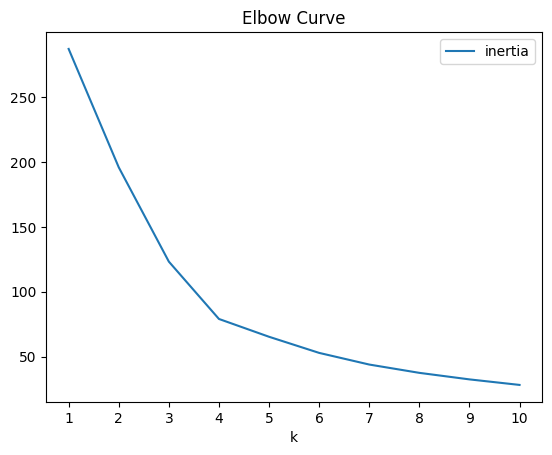

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve = df_elbow_data.plot.line(x = 'k', y = 'inertia', title = 'Elbow Curve', xticks = k)
elbow_curve

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4)

In [ ]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [ ]:
# Create a copy of the DataFrame
df_market_scaled_predictions = df_market_data_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_predictions['CryptoCluster'] = crypto_clusters

# Display sample data
df_market_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


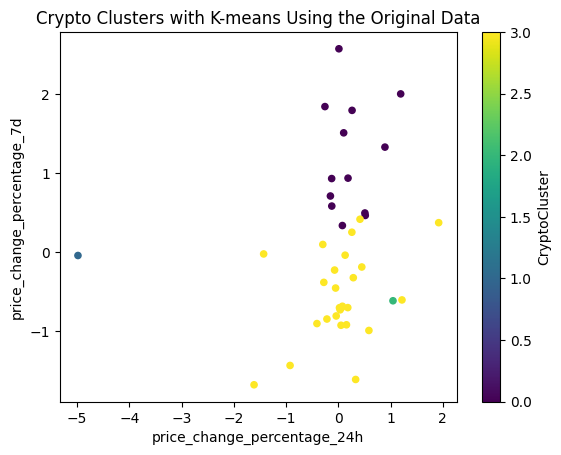

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_clusters = df_market_scaled_predictions.plot.scatter(
    x = 'price_change_percentage_24h', y = 'price_change_percentage_7d',
    c = 'CryptoCluster', colormap='viridis',
    title = 'Crypto Clusters with K-means Using the Original Data'
)
crypto_clusters
plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [ ]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame.
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three principal components account for about 89.6% of the overall variance.

In [ ]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(market_data_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_market_data_pca['crypto_names'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index('crypto_names')

# Display sample data
df_market_data_pca.head()


,PCA1,PCA2,PCA3
crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k = k_values = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters = i, random_state = 0)
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(df_market_data_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

<Axes: title={'center': 'Elbow Curve using PCA Data'}, xlabel='k'>

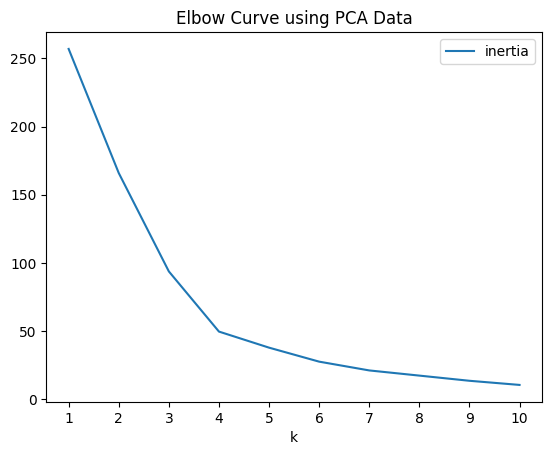

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_pca = df_elbow_pca.plot.line(x = 'k', y = 'inertia', title = 'Elbow Curve using PCA Data', xticks = k)
elbow_curve_pca

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. The best k value found using the PCA data remains the same as the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters = 4)

In [ ]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [ ]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predictions['CryptoCluster'] = crypto_clusters_pca

# Display sample data
df_market_pca_predictions.head()

,PCA1,PCA2,PCA3,CryptoCluster
crypto_names,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: title={'center': 'Crypto Clusters with K-means Using PCA Data'}, xlabel='PCA1', ylabel='PCA2'>

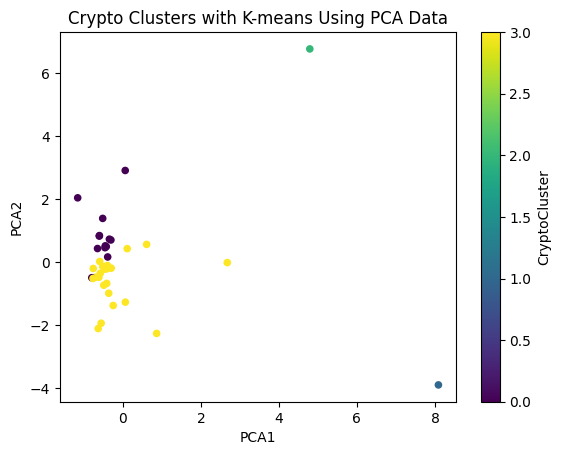

In [ ]:
# Create a scatter plot using plt by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_pca_clusters = df_market_pca_predictions.plot.scatter(x = 'PCA1', y = 'PCA2',
                                                               c = 'CryptoCluster', colormap='viridis',
                                                               title = 'Crypto Clusters with K-means Using PCA Data'
                                                              )
crypto_pca_clusters

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

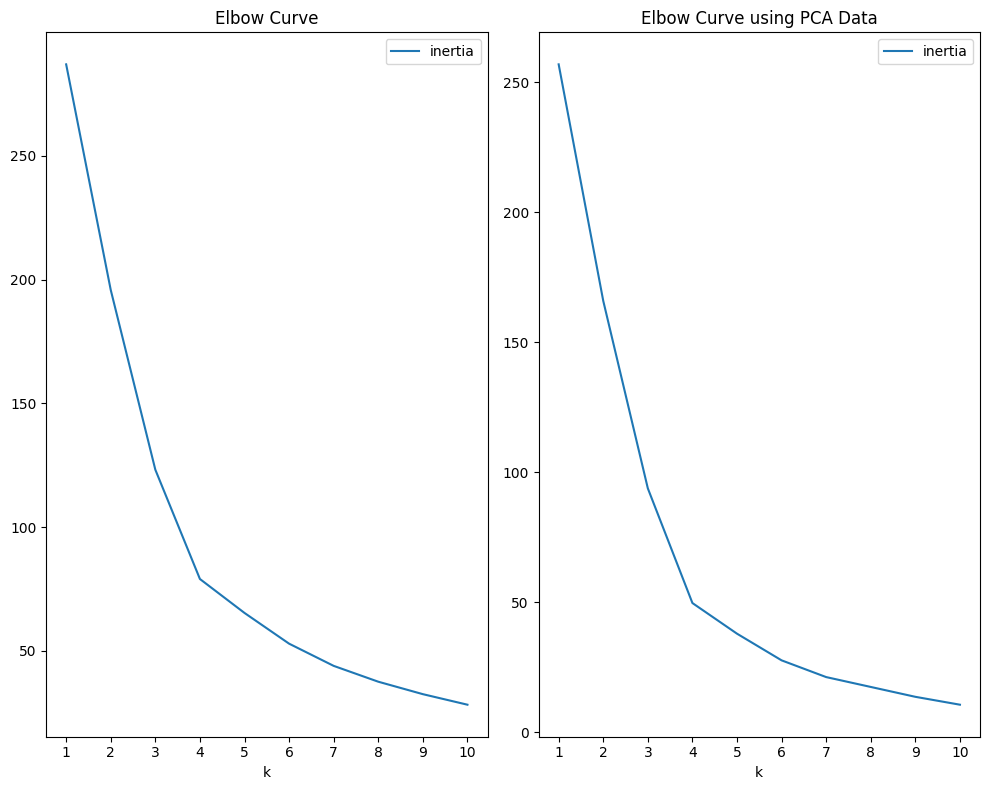

In [ ]:
# Composite plot to contrast the Elbow curves
fig, (elbow_curve, elbow_curve_pca) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
df_elbow_data.plot.line(x='k', y='inertia', title='Elbow Curve', xticks=k, ax=elbow_curve)
df_elbow_pca.plot.line(x='k', y='inertia', title='Elbow Curve using PCA Data', xticks=k, ax=elbow_curve_pca)

plt.tight_layout()
plt.show()


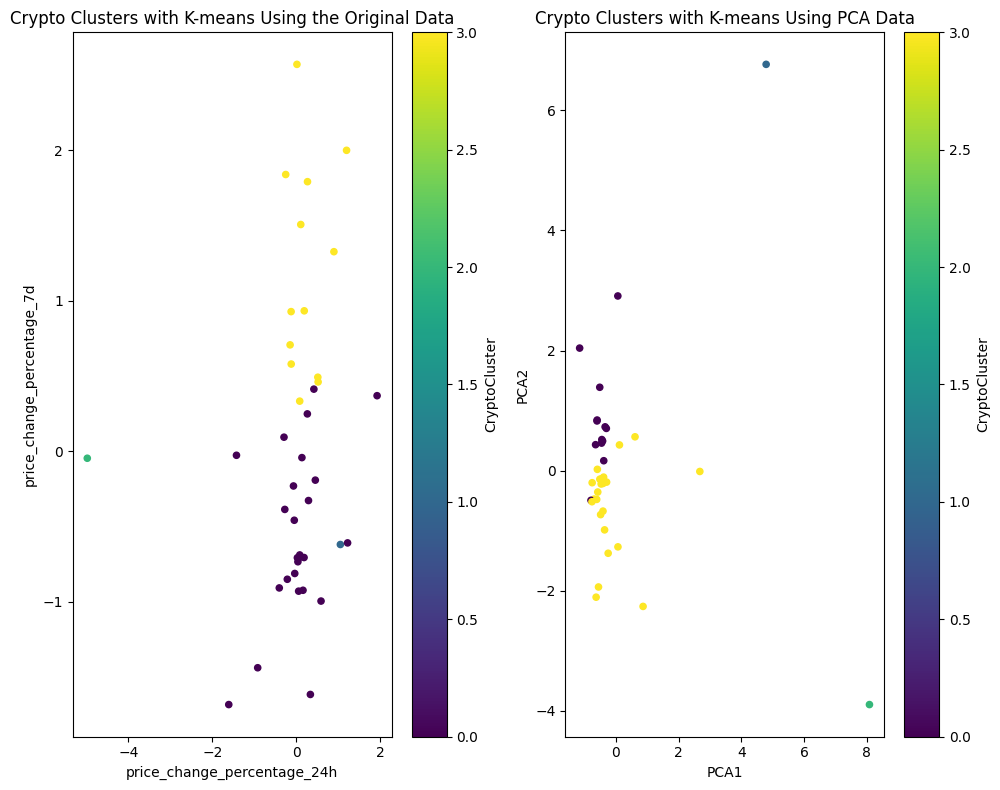

In [ ]:
# Composite plot to contrast the clusters
fig, (crypto_clusters, crypto_pca_clusters) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
df_market_scaled_predictions.plot.scatter(
    x='price_change_percentage_24h', y='price_change_percentage_7d',
    c='CryptoCluster', colormap='viridis',
    title='Crypto Clusters with K-means Using the Original Data', ax=crypto_clusters
)
df_market_pca_predictions.plot.scatter(
    x='PCA1', y='PCA2',
    c='CryptoCluster', colormap='viridis',
    title='Crypto Clusters with K-means Using PCA Data', ax=crypto_pca_clusters
)
plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** K-means data clustering appears to reduce clutter in the clusters when fewer features are used, leading to a clearer and more understandable grouping of the data.